In [1]:
#import sys
#sys.path.insert(0, '/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages')
#sys.path.insert(0, '/path/to/your/cloned/gcr-catalogs')

In [2]:
import numpy as np
from GCR import GCRQuery
import GCRCatalogs

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
catalog = GCRCatalogs.load_catalog('dc2_coadd_run1.1p')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCR.py:404: UserWarning: Native quantity `r_slot_PsfFlux_flux` does not exist (required by `psFlux_r_lsst`)
  warnings.warn(msg)


In [5]:
sorted(catalog.list_all_quantities())

['I_flag',
 'I_flag_g_lsst',
 'I_flag_i_lsst',
 'I_flag_r_lsst',
 'I_flag_u_lsst',
 'I_flag_y_lsst',
 'I_flag_z_lsst',
 'Ixx',
 'IxxPSF',
 'IxxPSF_g_lsst',
 'IxxPSF_i_lsst',
 'IxxPSF_r_lsst',
 'IxxPSF_u_lsst',
 'IxxPSF_y_lsst',
 'IxxPSF_z_lsst',
 'Ixx_g_lsst',
 'Ixx_i_lsst',
 'Ixx_r_lsst',
 'Ixx_u_lsst',
 'Ixx_y_lsst',
 'Ixx_z_lsst',
 'Ixy',
 'IxyPSF',
 'IxyPSF_g_lsst',
 'IxyPSF_i_lsst',
 'IxyPSF_r_lsst',
 'IxyPSF_u_lsst',
 'IxyPSF_y_lsst',
 'IxyPSF_z_lsst',
 'Ixy_g_lsst',
 'Ixy_i_lsst',
 'Ixy_r_lsst',
 'Ixy_u_lsst',
 'Ixy_y_lsst',
 'Ixy_z_lsst',
 'Iyy',
 'IyyPSF',
 'IyyPSF_g_lsst',
 'IyyPSF_i_lsst',
 'IyyPSF_r_lsst',
 'IyyPSF_u_lsst',
 'IyyPSF_y_lsst',
 'IyyPSF_z_lsst',
 'Iyy_g_lsst',
 'Iyy_i_lsst',
 'Iyy_r_lsst',
 'Iyy_u_lsst',
 'Iyy_y_lsst',
 'Iyy_z_lsst',
 'SNR_g_CModel',
 'SNR_i_CModel',
 'SNR_r_CModel',
 'SNR_u_CModel',
 'SNR_y_CModel',
 'SNR_z_CModel',
 'blendedness',
 'centroidX',
 'centroidX_err',
 'centroidY',
 'centroidY_err',
 'centroid_flag',
 'dec',
 'extendedness',
 'goo

In [7]:
catalog.available_tracts_and_patches[:20]

[{'tract': 4430, 'patch': '0,1'},
 {'tract': 4430, 'patch': '0,2'},
 {'tract': 4430, 'patch': '0,3'},
 {'tract': 4430, 'patch': '0,4'},
 {'tract': 4430, 'patch': '0,5'},
 {'tract': 4430, 'patch': '0,6'},
 {'tract': 4430, 'patch': '0,7'},
 {'tract': 4430, 'patch': '1,1'},
 {'tract': 4430, 'patch': '1,2'},
 {'tract': 4430, 'patch': '1,3'},
 {'tract': 4430, 'patch': '1,4'},
 {'tract': 4430, 'patch': '1,5'},
 {'tract': 4430, 'patch': '1,6'},
 {'tract': 4430, 'patch': '1,7'},
 {'tract': 4430, 'patch': '2,1'},
 {'tract': 4430, 'patch': '2,2'},
 {'tract': 4430, 'patch': '2,3'},
 {'tract': 4430, 'patch': '2,4'},
 {'tract': 4430, 'patch': '2,5'},
 {'tract': 4430, 'patch': '2,6'}]

In [8]:
catalog.available_tracts

[4430,
 4431,
 4432,
 4433,
 4636,
 4637,
 4638,
 4639,
 4640,
 4848,
 4849,
 4850,
 4851,
 4852,
 5062,
 5063,
 5064,
 5065,
 5066]

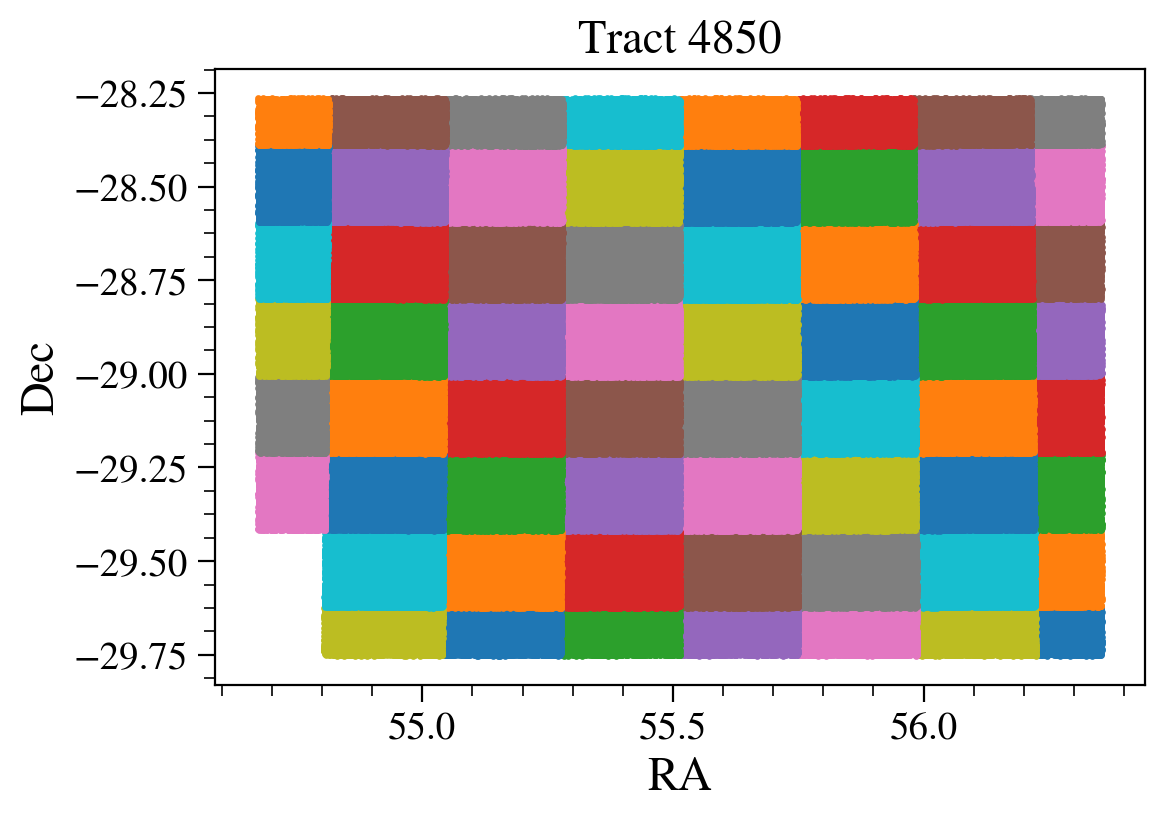

In [9]:
tract_number = 4850
for d in catalog.get_quantities(['ra', 'dec'], native_filters=[(lambda x: x==tract_number, 'tract')], return_iterator=True):
    plt.scatter(d['ra'], d['dec'], s=2);
plt.xlabel('RA');
plt.ylabel('Dec');
plt.title('Tract {}'.format(tract_number));

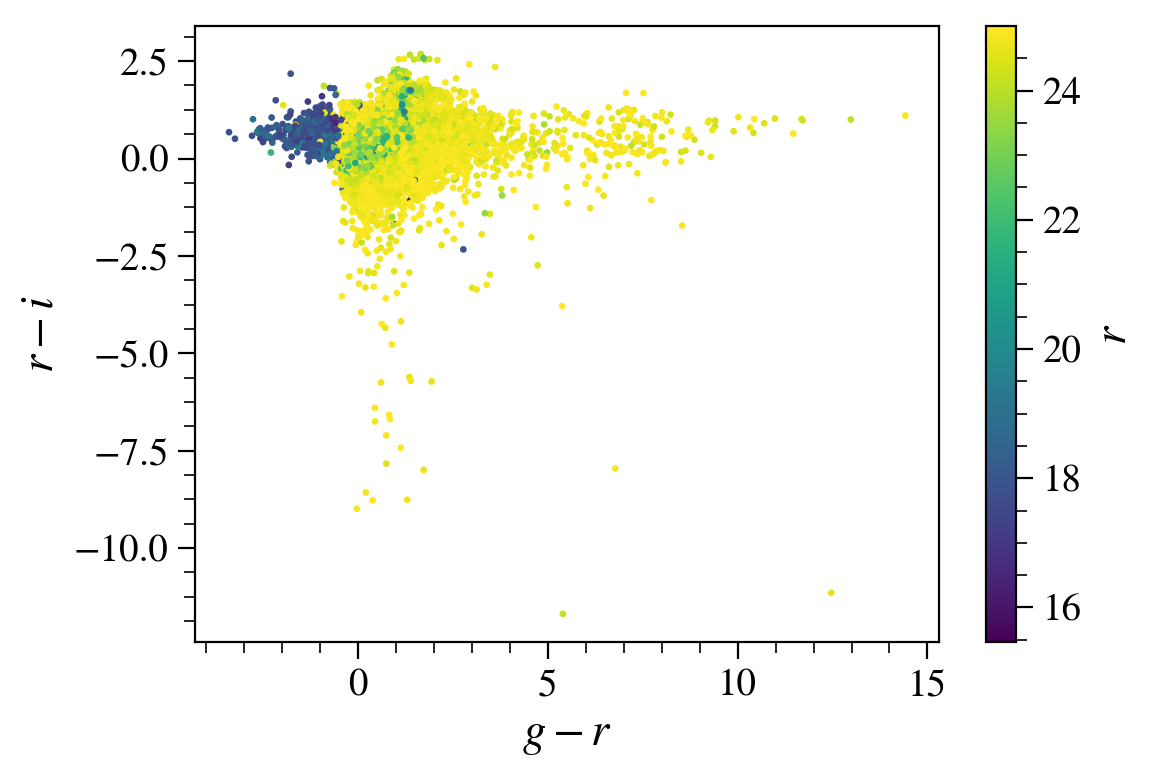

In [10]:
tract_number = 4850
mags = ['mag_g_lsst', 'mag_r_lsst', 'mag_i_lsst']
d = catalog.get_quantities(mags, 
                           filters=[GCRQuery((np.isfinite, key)) for key in mags] + ['mag_r_lsst < 25'], 
                           native_filters=[(lambda x: x==tract_number, 'tract')])
c = plt.scatter(d['mag_g_lsst'] - d['mag_r_lsst'], d['mag_r_lsst'] - d['mag_i_lsst'], s=2, c=d['mag_r_lsst']);
plt.colorbar(c, label='$r$')
plt.xlabel('$g-r$');
plt.ylabel('$r-i$');


Here's an example from https://github.com/LSSTDESC/DC2_Repo/blob/issues/155/Validation/lensing_distributions.ipynb

In [13]:
catalog.add_quantity_modifier('HSM_res', 
                              'ext_shapeHSM_HsmShapeRegauss_resolution', 
                              overwrite=True)
catalog.add_quantity_modifier('HSM_ell', 
                              (np.hypot, 'ext_shapeHSM_HsmShapeRegauss_e1', 'ext_shapeHSM_HsmShapeRegauss_e2'), 
                              overwrite=True)

In [11]:
# Lensing cuts based on Mandelbaum 2017 (arxiv 1705.06745)

lensing_cuts = [
    ~GCRQuery((np.isnan, 'mag_i_CModel')), # (from this and below) remove nan entries
    ~GCRQuery((np.isnan, 'ext_shapeHSM_HsmShapeRegauss_resolution')),
    ~GCRQuery((np.isnan, 'ext_shapeHSM_HsmShapeRegauss_e1')),
    ~GCRQuery((np.isnan, 'ext_shapeHSM_HsmShapeRegauss_e2')),
    GCRQuery('good'), 
    GCRQuery('SNR_i_CModel >= 10'), # (from this and below) cut on object properties
    GCRQuery('HSM_res >= 0.3'),
    GCRQuery('HSM_ell < 2.0'),
    GCRQuery('ext_shapeHSM_HsmShapeRegauss_sigma <= 0.4'),
    GCRQuery('mag_i_CModel < 24.5'), # FIXME: Doesnt have exinction correction
    GCRQuery('blendedness < 10**(-0.375)'),
]

In [14]:
tract_number = 4850
quantities = ['mag_i_CModel', 'SNR_i_CModel', 'HSM_res', 'HSM_ell', 'psf_fwhm_i']
d = catalog.get_quantities(quantities, 
                           filters=lensing_cuts, 
                           native_filters=[(lambda x: x==tract_number, 'tract')])

../../gcr-catalogs/GCRCatalogs/dc2_coadd.py:157: RuntimeWarning: divide by zero encountered in log10
  lambda x: -2.5 * np.log10(x) + 27.0,
../../gcr-catalogs/GCRCatalogs/dc2_coadd.py:157: RuntimeWarning: invalid value encountered in log10
  lambda x: -2.5 * np.log10(x) + 27.0,


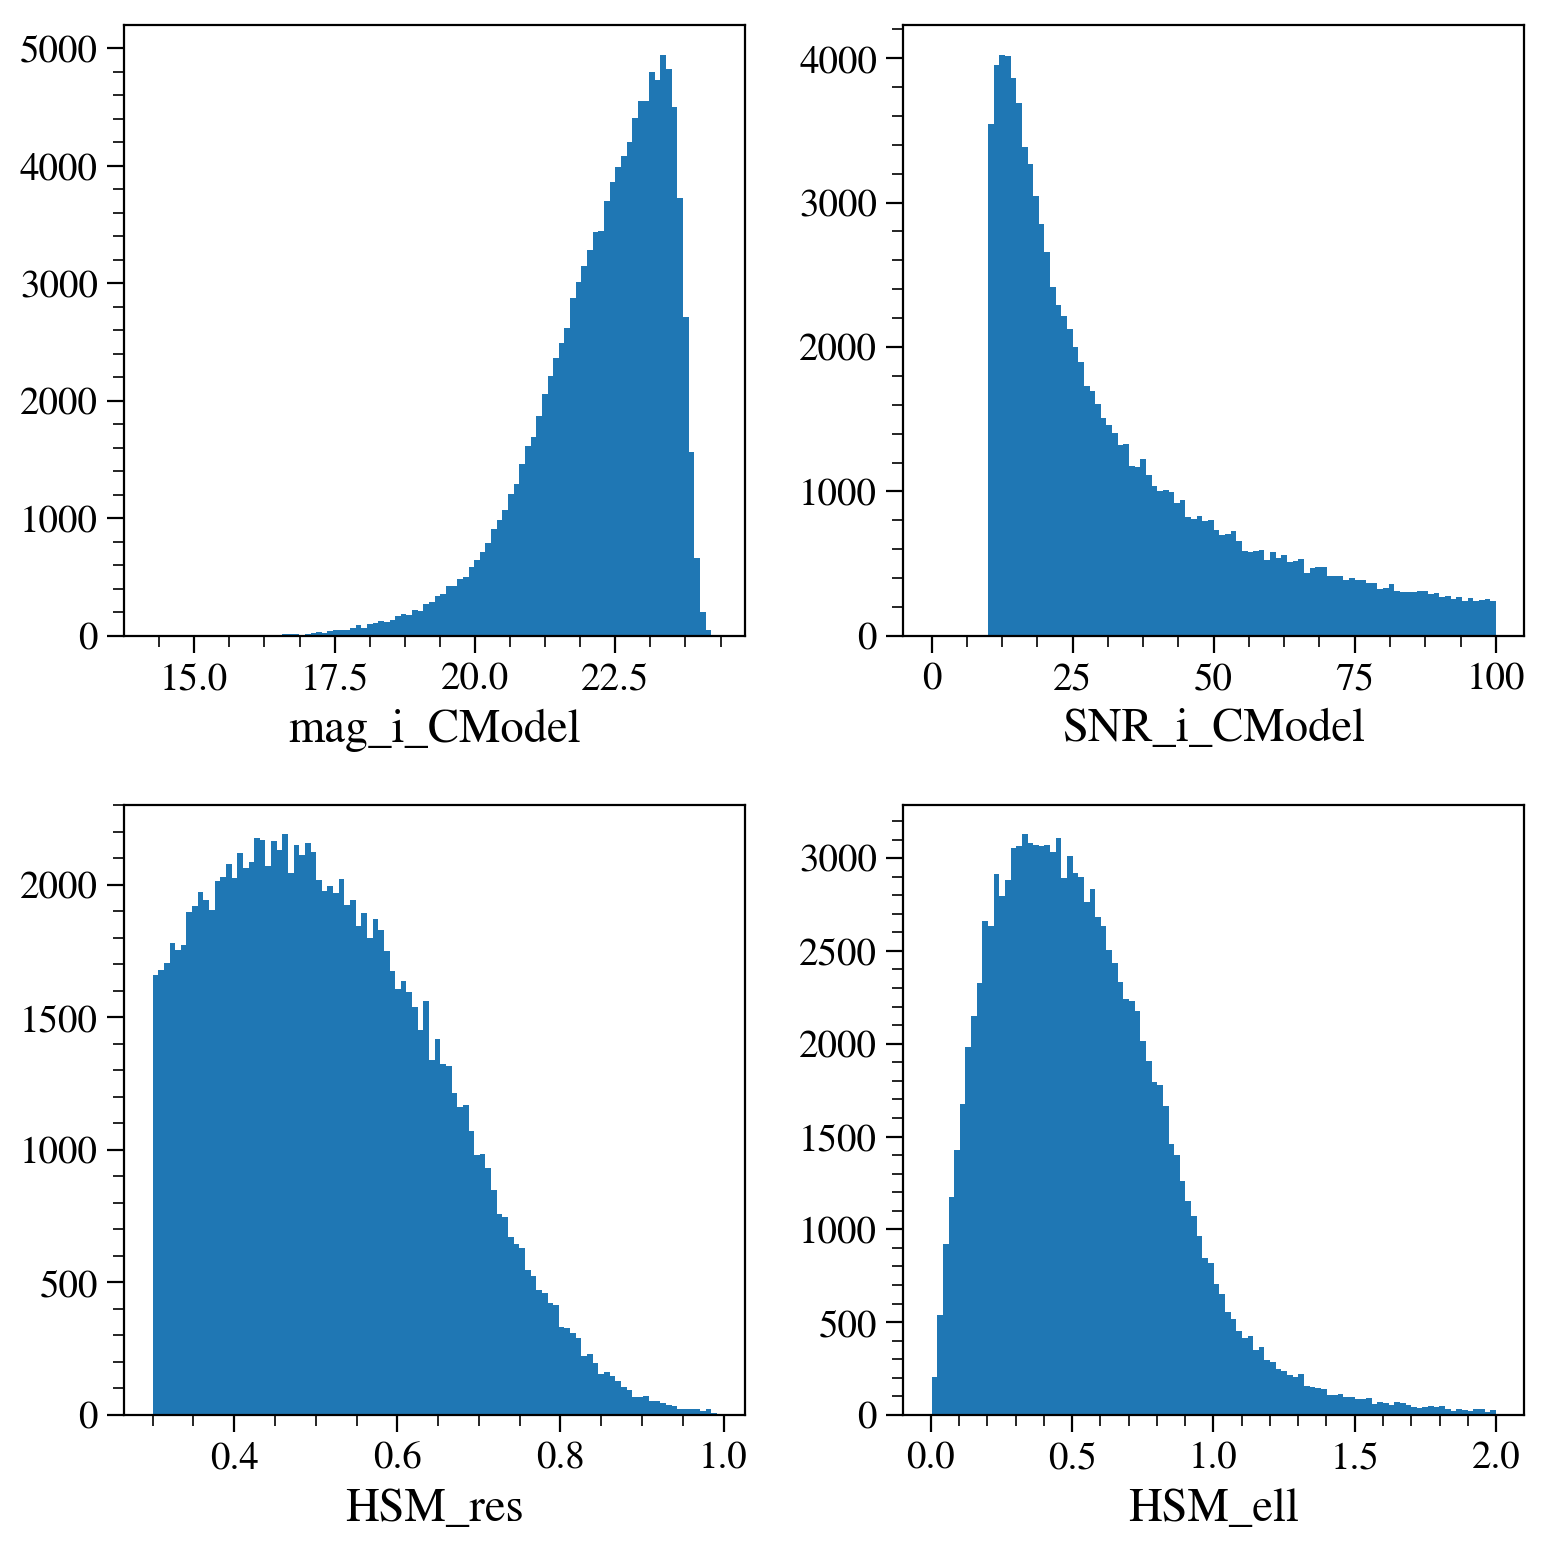

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))
for ax_this, quantity in zip(ax.flat, quantities):
    ax_this.hist(d[quantity], 100, range=([0,100] if quantity=='SNR_i_CModel' else None))
    ax_this.set_xlabel(quantity)
fig.tight_layout()

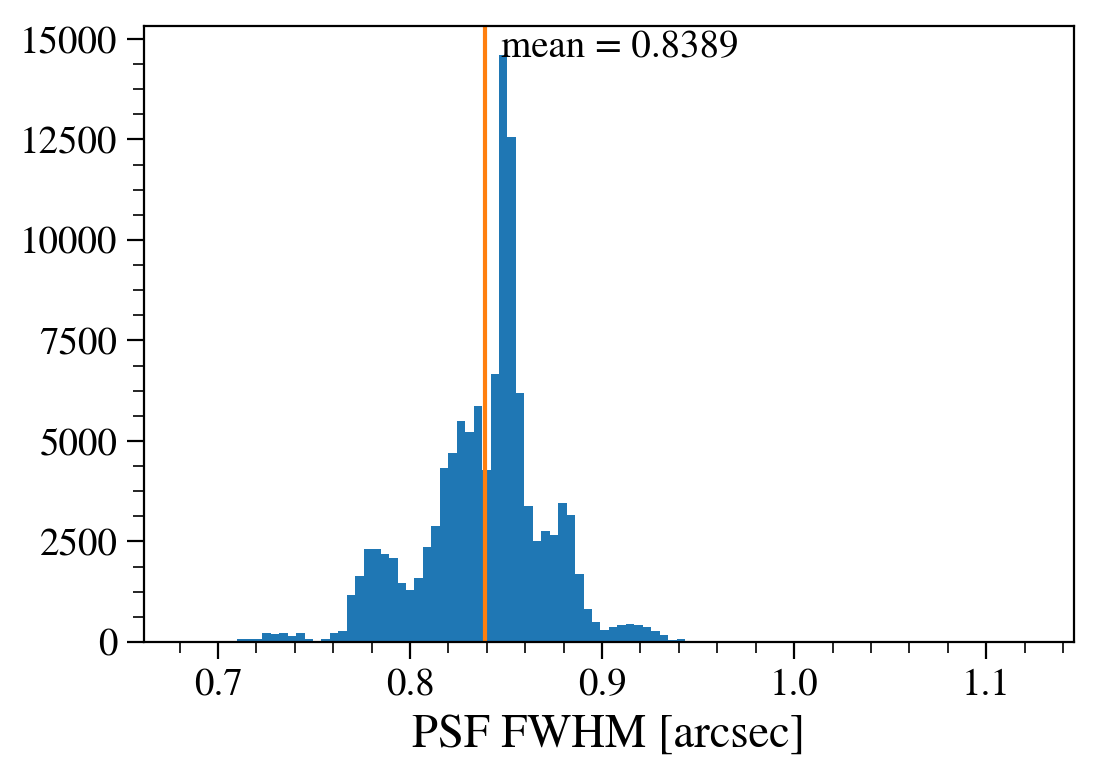

In [16]:
fig, ax = plt.subplots()
ax.hist(d['psf_fwhm_i'], 100);
mean = d['psf_fwhm_i'].mean()
ax.axvline(mean, c='C1');
ax.text(mean*1.01, ax.get_ylim()[1]*0.95, 'mean = {:.4g}'.format(mean));
ax.set_xlabel('PSF FWHM [arcsec]');